In [1]:
from MultiLabelEvolvingSNN import *
import arff
import warnings
from scipy.io import loadmat
warnings.filterwarnings("ignore")
%matplotlib inline
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
device = torch.device('cuda:2' if torch.cuda.is_available() else 'cpu')

## Load data and convert to Spikes

In [2]:
trainpath = '../datasets/scene/scene_train_MVMD.mat'
testpath = '../datasets/scene/scene_test_MVMD.mat'

train_ = loadmat(trainpath)
train_data, train_labels = train_['transformed_train_data'], train_['labels']

test_ = loadmat(testpath)
test_data, test_labels = test_['transformed_test_data'], test_['labels']

a = train_data.max(axis=0)
b = train_data.min(axis=0)

train_spikes = encoding(train_data, device, a, b)
test_spikes = encoding(test_data, device, a, b)
print("Train data shape: ", np.array(train_spikes).shape)
print("Train labels shape: ", np.array(train_labels).shape)
print("Test data shape: ", np.array(test_spikes).shape)
print("Test labels shape: ", np.array(test_labels).shape)

100%|██████████| 1196/1196 [00:00<00:00, 3235.76it/s]

Train data shape:  (1211, 1, 300)
Train labels shape:  (1211, 6)
Test data shape:  (1196, 1, 300)
Test labels shape:  (1196, 6)


## MVMD SNN

  0%|          | 0/1000 [00:00<?, ?it/s]

Class 0, class 1 neurons = 1, class 0 neurons = 8
Class 1, class 1 neurons = 7, class 0 neurons = 5
Class 2, class 1 neurons = 2, class 0 neurons = 7
Class 3, class 1 neurons = 3, class 0 neurons = 8
Class 4, class 1 neurons = 6, class 0 neurons = 1
Class 5, class 1 neurons = 3, class 0 neurons = 1


 20%|██        | 200/1000 [2:02:35<7:47:39, 35.07s/it]

Epoch number: 200
Train Precision: 0.9792, Test Precision: 0.9734
Train Recall: 0.2566, Test Recall: 0.2256
Train F1: 0.4067, Test F1: 0.3663
Max. train classwise accuracy for is 0.9488
Min. train classwise accuracy for is 0.7770
Max. test classwise accuracy for is 0.9164
Min. test classwise accuracy for is 0.7893


 40%|████      | 400/1000 [3:41:51<4:56:20, 29.63s/it]

Epoch number: 400
Train Precision: 0.8736, Test Precision: 0.8155
Train Recall: 0.6773, Test Recall: 0.5920
Train F1: 0.7630, Test F1: 0.6860
Max. train classwise accuracy for is 0.9719
Min. train classwise accuracy for is 0.8406
Max. test classwise accuracy for is 0.9440
Min. test classwise accuracy for is 0.8135


 60%|██████    | 600/1000 [5:20:05<3:15:42, 29.36s/it]

Epoch number: 600
Train Precision: 0.8601, Test Precision: 0.7663
Train Recall: 0.7652, Test Recall: 0.6613
Train F1: 0.8099, Test F1: 0.7099
Max. train classwise accuracy for is 0.9810
Min. train classwise accuracy for is 0.8778
Max. test classwise accuracy for is 0.9498
Min. test classwise accuracy for is 0.8219


 80%|████████  | 800/1000 [6:57:40<1:37:20, 29.20s/it]

Epoch number: 800
Train Precision: 0.8689, Test Precision: 0.7574
Train Recall: 0.7830, Test Recall: 0.6513
Train F1: 0.8237, Test F1: 0.7003
Max. train classwise accuracy for is 0.9860
Min. train classwise accuracy for is 0.8803
Max. test classwise accuracy for is 0.9507
Min. test classwise accuracy for is 0.8135


100%|██████████| 1000/1000 [8:35:15<00:00, 30.92s/it] 

Epoch number: 1000
Train Precision: 0.8971, Test Precision: 0.7729
Train Recall: 0.7862, Test Recall: 0.6420
Train F1: 0.8380, Test F1: 0.7014
Max. train classwise accuracy for is 0.9876
Min. train classwise accuracy for is 0.8877
Max. test classwise accuracy for is 0.9532
Min. test classwise accuracy for is 0.8085
Max. Test Precision: 1.0000 at epoch 1
Test Recall at max. test precision: 0.0015
Test F1 at max. test precision: 0.0031
Train Precision at max. test precision: 1.0000
Train Recall at max. test precision: 0.0156
Train F1 at max. test precision: 0.0306
Max. Test Recall: 0.6659 at epoch 641
Test Precision at max. test recall: 0.7561
Test F1 at max. test recall: 0.7081
Train Recall at max. test recall: 0.7830
Train Precision at max. test recall: 0.8556
Train F1 at max. test recall: 0.8177
Max. Test F1: 0.7133 at epoch 546
Test Recall at max. test F1: 0.6597
Test Precision at max. test F1: 0.7763
Train Recall at max. test F1: 0.7589
Train Precision at max. test F1: 0.8630
Train 

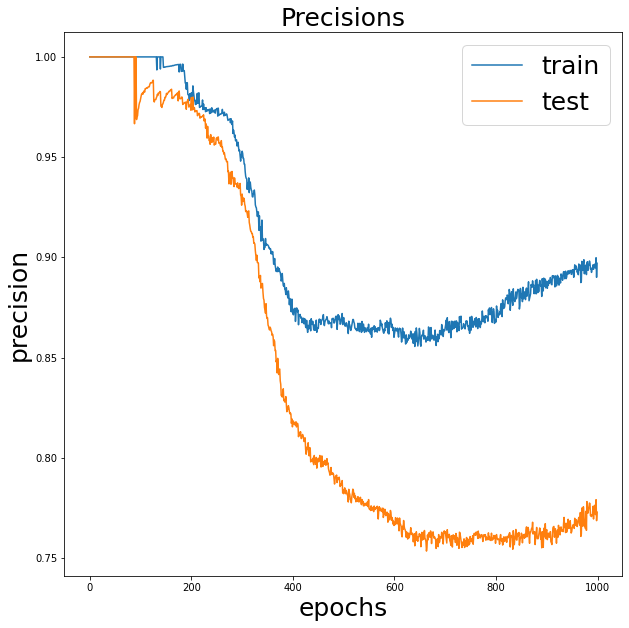

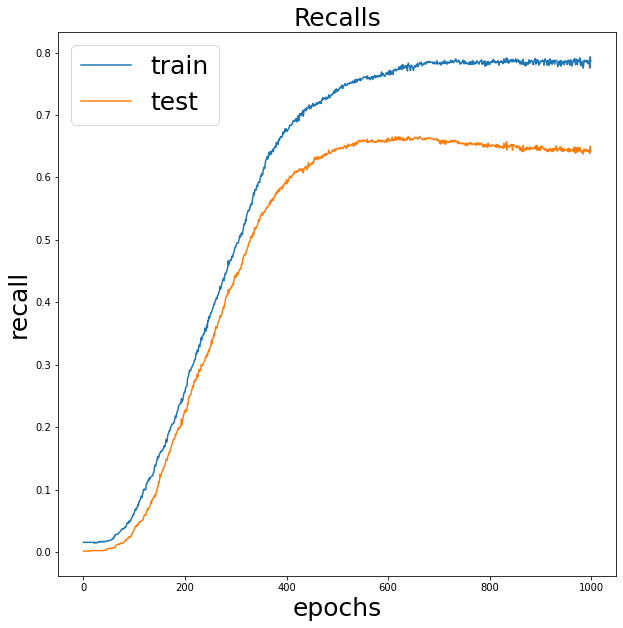

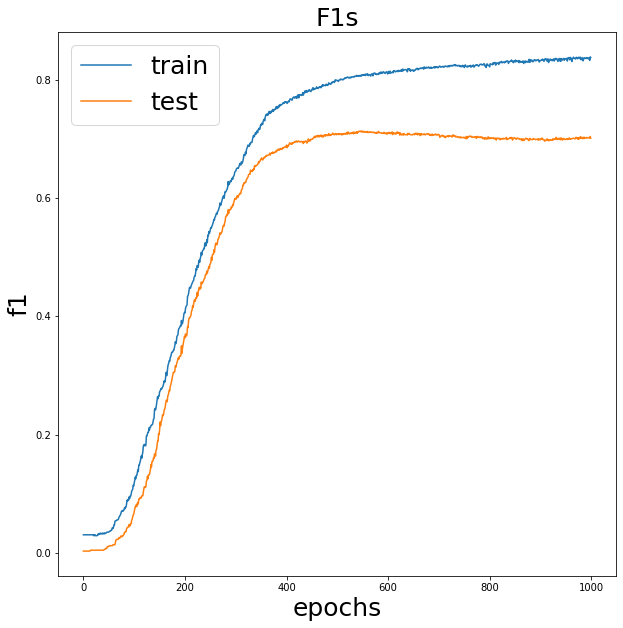

In [3]:
hparams_dict = {
    'name': 'scene',
    'inputs': 300,
    'outputs': 6,
    'time_constant': 300,
    'alpha_a': 0.42,
    'alpha_m': 0.07,
    'w_max': 100.0,
    'w_min': -100.0,
    'lr': 5e-4,
    'sim_time': 600,
    'n_epochs': 1000,
    'print_every': 200,
    'seed': 2,
    'ckpt_dir': './checkpoints/scene/mvmd',
    'load_from_file': None,
    'device': device
}
net = OverallSNN(hparams_dict)
train_history, test_history = net.fit(train_spikes, train_labels, test_spikes, test_labels)

In [3]:
hparams_dict = {
    'name': 'scene',
    'inputs': 300,
    'outputs': 6,
    'time_constant': 300,
    'alpha_a': 0.42,
    'alpha_m': 0.07,
    'w_max': 100.0,
    'w_min': -100.0,
    'lr': 5e-4,
    'sim_time': 600,
    'n_epochs': 1000,
    'print_every': 200,
    'seed': 2,
    'ckpt_dir': './checkpoints/scene/mvmd',
    'load_from_file': './checkpoints/scene/mvmd/best_f1_model0.0005_1000.pkl',
    'device': device
}
net = OverallSNN(hparams_dict)
metrics = Metrics(net, train_spikes, train_labels, test_spikes, test_labels)
metrics.evaluate()

Model was trained on 6 classes
Evaluating Model on train mode
Classwise Results
|                     |         0 |         1 |         2 |         3 |        4 |        5 |
|:--------------------|----------:|----------:|----------:|----------:|---------:|---------:|
| class               | 1         | 2         | 3         | 4         | 5        | 6        |
| accuracy            | 0.920727  | 0.979356  | 0.966969  | 0.961189  | 0.87531  | 0.912469 |
| hamming loss        | 0.0792733 | 0.0206441 | 0.0330306 | 0.0388109 | 0.12469  | 0.087531 |
| zero_one_loss       | 0.0792733 | 0.0206441 | 0.0330306 | 0.0388109 | 0.12469  | 0.087531 |
| micro av. jaccard   | 0.853099  | 0.959547  | 0.936051  | 0.925278  | 0.778267 | 0.839028 |
| macro av. jaccard   | 0.768196  | 0.91432   | 0.887256  | 0.864638  | 0.689581 | 0.756409 |
| micro av. precision | 0.920727  | 0.979356  | 0.966969  | 0.961189  | 0.87531  | 0.912469 |
| macro av. precision | 0.887764  | 0.976609  | 0.944223  | 0.948459  | 0.